# Milestone1

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
# load and read any dataset
data = pd.read_csv('D:\Cu\hiradius\datasets1\H2HBABBA2299.csv')
data.shape

(50000, 19)

### Analyse the data

In [3]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100030443,GLACIE foundation,2019-11-15 00:00:00,2019.0,1.930048e+09,2019-10-23,20191023,20191023,20191107.0,USD,RV,1.0,NaN,925.27,20191023.0,NAA8,1.930048e+09,0
1,U001,200744019,TARG foundation,2019-07-12 00:00:00,2019.0,1.929541e+09,2019-06-25,20190625,20190625,20190710.0,USD,RV,1.0,NaN,132548.21,20190625.0,NAA8,1.929541e+09,0
2,U001,0200769623,WAL-MAR corp,2019-11-19 00:00:00,2019.0,1.930131e+09,2019-11-09,20191108,20191109,20191124.0,USD,RV,1.0,NaN,69755.72,20191109.0,NAH4,1.930131e+09,0
3,U001,0200769623,WAL-MAR associates,2019-10-28 00:00:00,2019.0,1.930016e+09,2019-10-16,20191015,20191016,20191031.0,USD,RV,1.0,NaN,56248.33,20191016.0,NAH4,1.930016e+09,0
4,U001,0200749782,KROG trust,2019-07-23 00:00:00,2019.0,1.929587e+09,2019-07-08,20190708,20190708,20190723.0,USD,RV,1.0,NaN,12417.30,20190708.0,NAA8,1.929587e+09,0


In [4]:
# to check which column has how many null data
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [5]:
#Since our target value is clear_date and
#hence seprating data into two parts
#1. final_Train where clear data is not null
#2. final_Test where clear data is null

In [6]:
#if clear_date.isnull is returning False,hence no null value else there is null value
final_train = data[data.clear_date.isnull()==False]
final_test = data[data.clear_date.isnull()]

## Pre-Processing

### Null Imputation

In [7]:
final_train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [8]:
#Here we can see invoice_id is having 3 null values corrosponding to which doc_id is not null
final_train[data.invoice_id.isna()== True]


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
17282,CA02,0140104409,LOB,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20181212,20181222.0,CAD,X2,1.0,NaN,628.6,20181212.0,CA10,NaN,0
34492,CA02,0140104223,H Y LO llc,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190315,20190325.0,CAD,X2,1.0,NaN,5070.0,20190315.0,CA10,NaN,0
35425,CA02,0140104429,COSTCO co,2019-05-02 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190227,20190309.0,CAD,X2,1.0,NaN,52992.0,20190227.0,CA10,NaN,0


In [9]:
#Here we can compare that invoice_id and doc_id is almost same except the 3 column
#And from above table we can see that 3 columns i.e they are having null values
final_train['invoice_id'].isin(final_train['doc_id']).value_counts()

True     39997
False        3
Name: invoice_id, dtype: int64

In [10]:
#It is better to drop the invoice_id column
final_train=final_train.drop(['invoice_id'], axis=1)

### Removal of Constant column /duplicates

In [11]:
#removing all columns having constant value i.e ,'posting_id'
final_train = final_train.loc[:,final_train.apply(pd.Series.nunique) != 1]

In [12]:
#Removing all rows and columns if all Null/Nan values ot are Null/NaN
final_train = final_train.dropna(how='all')
final_train = final_train.dropna(how='all', axis=1)

In [13]:
final_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0100030443,GLACIE foundation,2019-11-15 00:00:00,2019.0,1.930048e+09,2019-10-23,20191023,20191023,20191107.0,USD,RV,925.27,20191023.0,NAA8
1,U001,200744019,TARG foundation,2019-07-12 00:00:00,2019.0,1.929541e+09,2019-06-25,20190625,20190625,20190710.0,USD,RV,132548.21,20190625.0,NAA8
2,U001,0200769623,WAL-MAR corp,2019-11-19 00:00:00,2019.0,1.930131e+09,2019-11-09,20191108,20191109,20191124.0,USD,RV,69755.72,20191109.0,NAH4
3,U001,0200769623,WAL-MAR associates,2019-10-28 00:00:00,2019.0,1.930016e+09,2019-10-16,20191015,20191016,20191031.0,USD,RV,56248.33,20191016.0,NAH4
4,U001,0200749782,KROG trust,2019-07-23 00:00:00,2019.0,1.929587e+09,2019-07-08,20190708,20190708,20190723.0,USD,RV,12417.30,20190708.0,NAA8


In [14]:
#nunique() function return number of unique elements in the object
final_train.nunique()

business_code                 5
cust_number                1342
name_customer              3913
clear_date                  392
buisness_year                 2
doc_id                    39180
posting_date                424
document_create_date        428
document_create_date.1      425
due_in_date                 492
invoice_currency              2
document type                 2
total_open_amount         35674
baseline_create_date        435
cust_payment_terms           71
dtype: int64

In [15]:
final_train['document_create_date.1'].isin(final_train['document_create_date']).value_counts()

True     39999
False        1
Name: document_create_date.1, dtype: int64

In [16]:
#therefor drop documentcreatedate1.
del final_train['document_create_date.1']

### Converting dates in datetime formate to obtain delay

In [17]:
final_train['clear_date']=pd.to_datetime(final_train['clear_date'],format='%Y-%m-%d')
final_train['buisness_year']=pd.to_datetime(final_train['buisness_year'],format='%Y')
final_train['posting_date']=pd.to_datetime(final_train['posting_date'],format='%Y-%m-%d')
final_train['document_create_date']=pd.to_datetime(final_train['document_create_date'],format='%Y%m%d')
##final_train['document_create_date.1']=pd.to_datetime(final_train.'document_create_date.1')
final_train['due_in_date']=pd.to_datetime(final_train['due_in_date'],format='%Y%m%d')
final_train['baseline_create_date']=pd.to_datetime(final_train['baseline_create_date'],format='%Y%m%d')

In [18]:
final_train.buisness_year = final_train['buisness_year'].dt.year

### Creating The delay column for the pridiction

In [19]:
#delay=pd.Series(data3['clear_date']-data3['due_in_date'])
#data3.insert(-1,'delay',delay)

final_train['delay'] = final_train['clear_date']-final_train['due_in_date']

In [20]:
final_train['delay']=final_train['delay'].dt.days

In [21]:
final_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,U001,0100030443,GLACIE foundation,2019-11-15,2019,1.930048e+09,2019-10-23,2019-10-23,2019-11-07,USD,RV,925.27,2019-10-23,NAA8,8
1,U001,200744019,TARG foundation,2019-07-12,2019,1.929541e+09,2019-06-25,2019-06-25,2019-07-10,USD,RV,132548.21,2019-06-25,NAA8,2
2,U001,0200769623,WAL-MAR corp,2019-11-19,2019,1.930131e+09,2019-11-09,2019-11-08,2019-11-24,USD,RV,69755.72,2019-11-09,NAH4,-5
3,U001,0200769623,WAL-MAR associates,2019-10-28,2019,1.930016e+09,2019-10-16,2019-10-15,2019-10-31,USD,RV,56248.33,2019-10-16,NAH4,-3
4,U001,0200749782,KROG trust,2019-07-23,2019,1.929587e+09,2019-07-08,2019-07-08,2019-07-23,USD,RV,12417.30,2019-07-08,NAA8,0


In [22]:
final_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
delay                            int64
dtype: object

In [23]:
#sorting data in asscending oder 
final_train=final_train.sort_values(by=['posting_date'])

### Outlier detection and removal

In [24]:
#getting the outliers for total_open_amount
min_thresold, max_thresold = final_train.total_open_amount.quantile([0.001, 0.999])
min_thresold, max_thresold

(18.51, 315614.5534300018)

In [25]:
final_train= final_train[(final_train.total_open_amount<max_thresold) & (final_train.total_open_amount>min_thresold)]
final_train.shape

(39918, 15)

In [26]:
#getting the outliers for delay
min_thresold, max_thresold = final_train.delay.quantile([0.001, 0.999])
min_thresold, max_thresold

(-53.0, 93.16600000001199)

In [27]:
final_train= final_train[(final_train.delay<max_thresold) & (final_train.delay>min_thresold)]
final_train.shape

(39837, 15)

In [28]:
#getting the outliers for posting_date
min_thresold, max_thresold = final_train.posting_date.quantile([0.001, 0.999])
min_thresold, max_thresold

(Timestamp('2018-12-30 00:00:00'), Timestamp('2020-02-26 00:00:00'))

In [29]:
final_train= final_train[(final_train.posting_date<max_thresold) & (final_train.posting_date>min_thresold)]
final_train.shape

(39651, 15)

In [30]:
#Outliers for due_in_date
min_thresold, max_thresold = final_train.due_in_date.quantile([0.001, 0.999])
min_thresold, max_thresold

(Timestamp('2019-01-11 00:00:00'), Timestamp('2020-04-24 08:24:00.000000512'))

In [31]:
final_train= final_train[(final_train.due_in_date<max_thresold) & (final_train.due_in_date>min_thresold)]
final_train.shape

(39568, 15)

In [32]:
#outliers for doc_id
min_thresold, max_thresold = final_train.doc_id.quantile([0.001, 0.999])
min_thresold, max_thresold

(1928540096.268, 2960615304.0)

In [33]:
final_train= final_train[(final_train.doc_id<max_thresold) & (final_train.doc_id>min_thresold)]
final_train.shape

(39487, 15)

### Spliting final_train into Train/Test/Validation

In [34]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# ind --> contains the dataframe without the target i.e delay which are the independent varibles
final_train1=final_train
ind = final_train.drop('delay',axis=1)

# dep --> contains only the target value 
dep = final_train['delay']

In [35]:
ind.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
31785,U001,0200799367,MCL,2019-01-15,2019,1.928543e+09,2018-12-31,2018-12-30,2019-01-15,USD,RV,99976.50,2018-12-31,NAA8
13353,U001,0200769623,WAL-MAR us,2019-01-11,2019,1.928545e+09,2018-12-31,2018-12-30,2019-01-15,USD,RV,133.64,2018-12-31,NAH4
8460,U001,0200769623,WAL-MAR llc,2019-01-22,2019,1.928545e+09,2018-12-31,2018-12-30,2019-01-15,USD,RV,6392.40,2018-12-31,NAH4
9916,U001,0200735528,ASSOCIA corporation,2019-01-16,2019,1.928540e+09,2018-12-31,2018-12-29,2019-01-15,USD,RV,26775.60,2018-12-31,NAA8
8965,U001,0200744019,TARG in,2019-01-22,2019,1.928543e+09,2018-12-31,2018-12-30,2019-01-15,USD,RV,784.00,2018-12-31,NAA8


In [36]:
dep.head()

31785    0
13353   -4
8460     7
9916     1
8965     7
Name: delay, dtype: int64

In [37]:
#x_train on column y_train and x_data1 on y_data1
#x_train with y_train and x_data1with y_data1
x_train,x_data1,y_train,y_data1=train_test_split(ind,dep,test_size=0.2)#between 80% and 20%
x_valid,x_test,y_valid,y_test=train_test_split(x_data1,y_data1,test_size=0.5) #50-50

In [38]:
x_train.shape , x_valid.shape , x_test.shape

((31589, 14), (3949, 14), (3949, 14))

## Exploratory Data Analysis

In [39]:
y_train.dtypes

dtype('int64')

In [40]:
#y_train['delay'] = y_train['delay'].dt.days.astype('int16')

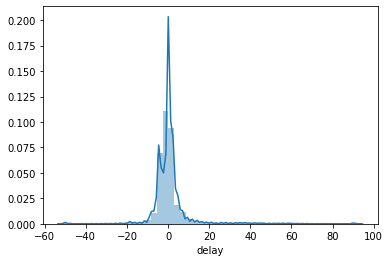

In [41]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant , hence  
sns.distplot(y_train)

In [42]:
x_train.merge(y_train,on = x_train.index).head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,4821,U001,0200048886,SHERWO co,2019-09-05,2019,1.929766e+09,2019-08-20,2019-08-20,2019-09-04,USD,RV,64735.62,2019-08-20,NAA8,1
1,34175,U001,0200741174,M B foundation,2019-10-16,2019,1.929933e+09,2019-09-27,2019-09-26,2019-10-12,USD,RV,23608.63,2019-09-27,NAA8,4
2,1353,U001,0200943275,US,2019-12-23,2019,1.930167e+09,2019-11-18,2019-11-18,2019-12-20,USD,RV,38060.15,2019-11-18,NA32,3
3,36432,U001,0200704858,WAKE us,2019-12-11,2019,1.930043e+09,2019-10-22,2019-10-22,2019-12-01,USD,RV,2881.67,2019-10-22,NAWU,10
4,31784,U001,200792734,MDV/ in,2019-07-26,2019,1.929563e+09,2019-07-01,2019-07-01,2019-07-16,USD,RV,80065.95,2019-07-01,NAA8,10


In [43]:
x_train.nunique()

business_code               5
cust_number              1226
name_customer            3506
clear_date                377
buisness_year               2
doc_id                  31083
posting_date              421
document_create_date      426
due_in_date               469
invoice_currency            2
document type               1
total_open_amount       28488
baseline_create_date      425
cust_payment_terms         66
dtype: int64

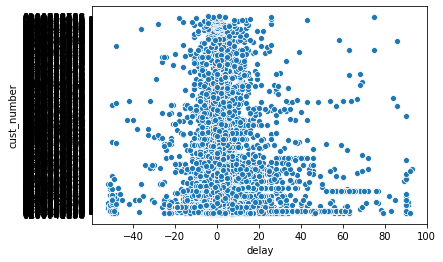

In [44]:
#No direct trend for customers having delay
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="cust_number")

# Milestone2

## Feature Engeeneering

### Label Encoding

In [45]:
x_train_f1 = x_train
x_valid_f1 = x_valid
x_test_f1 = x_test

In [46]:
#Droping clear_date from the data_frame and will keep it for validation
x_train_f1 = x_train_f1.drop(['clear_date'], axis=1)
x_valid_f1 = x_valid_f1.drop(['clear_date'], axis=1)
x_test_f1 = x_test_f1.drop(['clear_date'], axis=1)


In [47]:
x_train_f1.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
4821,U001,0200048886,SHERWO co,2019,1.929766e+09,2019-08-20,2019-08-20,2019-09-04,USD,RV,64735.62,2019-08-20,NAA8
34175,U001,0200741174,M B foundation,2019,1.929933e+09,2019-09-27,2019-09-26,2019-10-12,USD,RV,23608.63,2019-09-27,NAA8
1353,U001,0200943275,US,2019,1.930167e+09,2019-11-18,2019-11-18,2019-12-20,USD,RV,38060.15,2019-11-18,NA32
36432,U001,0200704858,WAKE us,2019,1.930043e+09,2019-10-22,2019-10-22,2019-12-01,USD,RV,2881.67,2019-10-22,NAWU
31784,U001,200792734,MDV/ in,2019,1.929563e+09,2019-07-01,2019-07-01,2019-07-16,USD,RV,80065.95,2019-07-01,NAA8


In [48]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(x_train_f1['business_code'])
x_train_f1['business_code_enc'] = business_code_encoder.transform(x_train_f1['business_code'])

In [49]:
x_train_f1.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,business_code_enc
4821,U001,0200048886,SHERWO co,2019,1.929766e+09,2019-08-20,2019-08-20,2019-09-04,USD,RV,64735.62,2019-08-20,NAA8,1
34175,U001,0200741174,M B foundation,2019,1.929933e+09,2019-09-27,2019-09-26,2019-10-12,USD,RV,23608.63,2019-09-27,NAA8,1
1353,U001,0200943275,US,2019,1.930167e+09,2019-11-18,2019-11-18,2019-12-20,USD,RV,38060.15,2019-11-18,NA32,1
36432,U001,0200704858,WAKE us,2019,1.930043e+09,2019-10-22,2019-10-22,2019-12-01,USD,RV,2881.67,2019-10-22,NAWU,1
31784,U001,200792734,MDV/ in,2019,1.929563e+09,2019-07-01,2019-07-01,2019-07-16,USD,RV,80065.95,2019-07-01,NAA8,1


In [50]:
business_code_encoder.fit(x_valid_f1['business_code'])
x_valid_f1['business_code_enc'] = business_code_encoder.transform(x_valid_f1['business_code'])

business_code_encoder.fit(x_test_f1['business_code'])
x_test_f1['business_code_enc'] = business_code_encoder.transform(x_test_f1['business_code'])



In [51]:
x_valid_f1.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,business_code_enc
28750,U001,200762301,C&S WH llc,2019,1.929077e+09,2019-04-04,2019-04-03,2019-04-19,USD,RV,111151.53,2019-04-04,NAC6,1
28882,U001,0200778355,US us,2020,1.930517e+09,2020-02-12,2020-02-12,2020-02-27,USD,RV,52761.81,2020-02-12,NAA8,1
47707,U001,0200744019,TARG corp,2020,1.930475e+09,2020-02-05,2020-02-04,2020-02-20,USD,RV,22254.50,2020-02-05,NAA8,1
2352,U001,0200794332,COST llc,2019,1.929908e+09,2019-09-23,2019-09-21,2019-10-08,USD,RV,65233.55,2019-09-23,NAAX,1
13811,U001,0200795490,HY - associates,2019,1.929665e+09,2019-07-25,2019-07-26,2019-08-09,USD,RV,64870.79,2019-07-25,NAA8,1


In [52]:
x_test_f1.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,business_code_enc
42442,U001,0200747369,SCHNU,2019,1.929377e+09,2019-05-24,2019-05-24,2019-06-08,USD,RV,24382.35,2019-05-24,NAA8,1
36370,U001,200752302,KROGER systems,2019,1.928777e+09,2019-02-12,2019-02-10,2019-02-27,USD,RV,18275.72,2019-02-12,NAA8,1
39350,U001,0200783609,PROFIC,2019,1.929284e+09,2019-05-14,2019-05-08,2019-06-15,USD,RV,27621.00,2019-05-14,NA32,1
12324,U001,0200799367,MCL,2019,1.928742e+09,2019-02-07,2019-02-05,2019-02-22,USD,RV,29840.02,2019-02-07,NAA8,1
10827,U001,0200331749,SYSC corporation,2019,1.929597e+09,2019-07-09,2019-07-09,2019-07-29,USD,RV,11712.15,2019-07-09,NAD1,1


In [53]:
#After encoding droping the main column
x_train_f1.drop(['business_code'], axis =1,inplace=True)
x_valid_f1.drop(['business_code'],axis=1 , inplace=True)
x_test_f1.drop(['business_code'],axis=1 , inplace=True)

In [54]:
#name_customer encoding
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(x_train_f1['name_customer'])
x_train_f1['name_customer_enc'] = name_customer_encoder.transform(x_train_f1['name_customer'])

name_customer_encoder.fit(x_valid_f1['name_customer'])
x_valid_f1['name_customer_enc'] = name_customer_encoder.transform(x_valid_f1['name_customer'])

name_customer_encoder.fit(x_test_f1['name_customer'])
x_test_f1['name_customer_enc'] = name_customer_encoder.transform(x_test_f1['name_customer'])


In [55]:
#After encoding droping the main column
x_train_f1.drop(['name_customer'], axis =1,inplace=True)
x_valid_f1.drop(['name_customer'],axis=1 , inplace=True)
x_test_f1.drop(['name_customer'],axis=1 , inplace=True)

In [56]:
#cust_number encoding
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(x_train_f1['cust_number'])
x_train_f1['cust_number_enc'] = cust_number_encoder.transform(x_train_f1['cust_number'])

cust_number_encoder.fit(x_valid_f1['cust_number'])
x_valid_f1['cust_number_enc'] = cust_number_encoder.transform(x_valid_f1['cust_number'])

cust_number_encoder.fit(x_test_f1['cust_number'])
x_test_f1['cust_number_enc'] = cust_number_encoder.transform(x_test_f1['cust_number'])


In [57]:
#After encoding droping the main column
x_train_f1.drop(['cust_number'], axis =1,inplace=True)
x_valid_f1.drop(['cust_number'],axis=1 , inplace=True)
x_test_f1.drop(['cust_number'],axis=1 , inplace=True)

In [58]:
x_train_f1.head()

,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,business_code_enc,name_customer_enc,cust_number_enc
4821,2019,1.929766e+09,2019-08-20,2019-08-20,2019-09-04,USD,RV,64735.62,2019-08-20,NAA8,1,2799,397
34175,2019,1.929933e+09,2019-09-27,2019-09-26,2019-10-12,USD,RV,23608.63,2019-09-27,NAA8,1,1909,693
1353,2019,1.930167e+09,2019-11-18,2019-11-18,2019-12-20,USD,RV,38060.15,2019-11-18,NA32,1,3279,890
36432,2019,1.930043e+09,2019-10-22,2019-10-22,2019-12-01,USD,RV,2881.67,2019-10-22,NAWU,1,3372,616
31784,2019,1.929563e+09,2019-07-01,2019-07-01,2019-07-16,USD,RV,80065.95,2019-07-01,NAA8,1,2070,1170


In [59]:
x_train_f1.dtypes

buisness_year                    int64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
business_code_enc                int32
name_customer_enc                int32
cust_number_enc                  int32
dtype: object

In [60]:
#For x_train_f1
#extract day,month and year so that we can do extract out some features

x_train_f1['posting_day'] = x_train_f1['posting_date'].dt.day
x_train_f1['posting_month'] = x_train_f1['posting_date'].dt.month
x_train_f1['posting_year'] = x_train_f1['posting_date'].dt.year

x_train_f1['document_create_day'] = x_train_f1['document_create_date'].dt.day
x_train_f1['document_create_month'] = x_train_f1['document_create_date'].dt.month
x_train_f1['document_create_year'] = x_train_f1['document_create_date'].dt.year


x_train_f1['due_in_day'] = x_train_f1['due_in_date'].dt.day
x_train_f1['due_in_month'] = x_train_f1['due_in_date'].dt.month
x_train_f1['due_in_year'] = x_train_f1['due_in_date'].dt.year

x_train_f1['baseline_create_day'] = x_train_f1['baseline_create_date'].dt.day
x_train_f1['baseline_create_month'] = x_train_f1['baseline_create_date'].dt.month
x_train_f1['baseline_create_year'] = x_train_f1['baseline_create_date'].dt.year

In [61]:
x_train_f1.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'], axis =1,inplace=True)

In [62]:
x_train_f1.head(5)

,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,business_code_enc,name_customer_enc,cust_number_enc,posting_day,...,posting_year,document_create_day,document_create_month,document_create_year,due_in_day,due_in_month,due_in_year,baseline_create_day,baseline_create_month,baseline_create_year
4821,2019,1.929766e+09,USD,RV,64735.62,NAA8,1,2799,397,20,...,2019,20,8,2019,4,9,2019,20,8,2019
34175,2019,1.929933e+09,USD,RV,23608.63,NAA8,1,1909,693,27,...,2019,26,9,2019,12,10,2019,27,9,2019
1353,2019,1.930167e+09,USD,RV,38060.15,NA32,1,3279,890,18,...,2019,18,11,2019,20,12,2019,18,11,2019
36432,2019,1.930043e+09,USD,RV,2881.67,NAWU,1,3372,616,22,...,2019,22,10,2019,1,12,2019,22,10,2019
31784,2019,1.929563e+09,USD,RV,80065.95,NAA8,1,2070,1170,1,...,2019,1,7,2019,16,7,2019,1,7,2019


In [63]:
#Here we can compare 2 columns, checking for there duplicates
x_train_f1['buisness_year'].isin(x_train_f1['baseline_create_year']).value_counts()
x_train_f1['buisness_year'].isin(x_train_f1['due_in_year']).value_counts()
x_train_f1['buisness_year'].isin(x_train_f1['document_create_year']).value_counts()
x_train_f1['buisness_year'].isin(x_train_f1['posting_year']).value_counts()

True    31589
Name: buisness_year, dtype: int64

In [64]:
#Droping Duplicate column
x_train_f1.drop(['baseline_create_year','due_in_year','document_create_year','posting_year'], axis =1,inplace=True)

In [65]:
#For x_valid_f1
#extract day,month and year so that we can do extract out some features

x_valid_f1['posting_day'] = x_valid_f1['posting_date'].dt.day
x_valid_f1['posting_month'] = x_valid_f1['posting_date'].dt.month
x_valid_f1['posting_year'] = x_valid_f1['posting_date'].dt.year

x_valid_f1['document_create_day'] = x_valid_f1['document_create_date'].dt.day
x_valid_f1['document_create_month'] = x_valid_f1['document_create_date'].dt.month
x_valid_f1['document_create_year'] = x_valid_f1['document_create_date'].dt.year


x_valid_f1['due_in_day'] = x_valid_f1['due_in_date'].dt.day
x_valid_f1['due_in_month'] = x_valid_f1['due_in_date'].dt.month
x_valid_f1['due_in_year'] = x_valid_f1['due_in_date'].dt.year

x_valid_f1['baseline_create_day'] = x_valid_f1['baseline_create_date'].dt.day
x_valid_f1['baseline_create_month'] = x_valid_f1['baseline_create_date'].dt.month
x_valid_f1['baseline_create_year'] = x_valid_f1['baseline_create_date'].dt.year

x_valid_f1.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'], axis =1,inplace=True)

In [66]:
#Here we can compare 2 columns, checking for there duplicates
x_valid_f1['buisness_year'].isin(x_valid_f1['baseline_create_year']).value_counts()
x_valid_f1['buisness_year'].isin(x_valid_f1['due_in_year']).value_counts()
x_valid_f1['buisness_year'].isin(x_valid_f1['document_create_year']).value_counts()
x_valid_f1['buisness_year'].isin(x_valid_f1['posting_year']).value_counts()

True    3949
Name: buisness_year, dtype: int64

In [67]:
#Droping Duplicate column
x_valid_f1.drop(['baseline_create_year','due_in_year','document_create_year','posting_year'], axis =1,inplace=True)

In [68]:
#For x_test_f1
#extract day,month and year so that we can do extract out some features

x_test_f1['posting_day'] = x_test_f1['posting_date'].dt.day
x_test_f1['posting_month'] = x_test_f1['posting_date'].dt.month
x_test_f1['posting_year'] = x_test_f1['posting_date'].dt.year

x_test_f1['document_create_day'] = x_test_f1['document_create_date'].dt.day
x_test_f1['document_create_month'] = x_test_f1['document_create_date'].dt.month
x_test_f1['document_create_year'] = x_test_f1['document_create_date'].dt.year


x_test_f1['due_in_day'] = x_test_f1['due_in_date'].dt.day
x_test_f1['due_in_month'] = x_test_f1['due_in_date'].dt.month
x_test_f1['due_in_year'] = x_test_f1['due_in_date'].dt.year

x_test_f1['baseline_create_day'] = x_test_f1['baseline_create_date'].dt.day
x_test_f1['baseline_create_month'] = x_test_f1['baseline_create_date'].dt.month
x_test_f1['baseline_create_year'] = x_test_f1['baseline_create_date'].dt.year

x_test_f1.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'], axis =1,inplace=True)

In [69]:
#Here we can compare 2 columns, checking for there duplicates
x_test_f1['buisness_year'].isin(x_test_f1['baseline_create_year']).value_counts()
x_test_f1['buisness_year'].isin(x_test_f1['due_in_year']).value_counts()
x_test_f1['buisness_year'].isin(x_test_f1['document_create_year']).value_counts()
x_test_f1['buisness_year'].isin(x_test_f1['posting_year']).value_counts()

True    3949
Name: buisness_year, dtype: int64

In [70]:
#Droping Duplicate columns
x_test_f1.drop(['baseline_create_year','due_in_year','document_create_year','posting_year'], axis =1,inplace=True)

In [71]:
x_train_f1.head()

,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,business_code_enc,name_customer_enc,cust_number_enc,posting_day,posting_month,document_create_day,document_create_month,due_in_day,due_in_month,baseline_create_day,baseline_create_month
4821,2019,1.929766e+09,USD,RV,64735.62,NAA8,1,2799,397,20,8,20,8,4,9,20,8
34175,2019,1.929933e+09,USD,RV,23608.63,NAA8,1,1909,693,27,9,26,9,12,10,27,9
1353,2019,1.930167e+09,USD,RV,38060.15,NA32,1,3279,890,18,11,18,11,20,12,18,11
36432,2019,1.930043e+09,USD,RV,2881.67,NAWU,1,3372,616,22,10,22,10,1,12,22,10
31784,2019,1.929563e+09,USD,RV,80065.95,NAA8,1,2070,1170,1,7,1,7,16,7,1,7


In [72]:
#invoice_currency encoding
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(x_train_f1['invoice_currency'])
x_train_f1['invoice_currency_enc'] = invoice_currency_encoder.transform(x_train_f1['invoice_currency'])

invoice_currency_encoder.fit(x_valid_f1['invoice_currency'])
x_valid_f1['invoice_currency_enc'] = invoice_currency_encoder.transform(x_valid_f1['invoice_currency'])

invoice_currency_encoder.fit(x_test_f1['invoice_currency'])
x_test_f1['invoice_currency_enc'] = invoice_currency_encoder.transform(x_test_f1['invoice_currency'])

In [73]:
#After encoding droping the main column
x_train_f1.drop(['invoice_currency'], axis =1,inplace=True)
x_valid_f1.drop(['invoice_currency'],axis=1 , inplace=True)
x_test_f1.drop(['invoice_currency'],axis=1 , inplace=True)

In [74]:
#document type encoding
document_type_encoder = LabelEncoder()
document_type_encoder.fit(x_train_f1['document type'])
x_train_f1['document_type_enc'] = document_type_encoder.transform(x_train_f1['document type'])

document_type_encoder.fit(x_valid_f1['document type'])
x_valid_f1['document_type_enc'] = document_type_encoder.transform(x_valid_f1['document type'])

document_type_encoder.fit(x_test_f1['document type'])
x_test_f1['document_type_enc'] = document_type_encoder.transform(x_test_f1['document type'])

In [75]:
#After encoding droping the main column
x_train_f1.drop(['document type'], axis =1,inplace=True)
x_valid_f1.drop(['document type'],axis=1 , inplace=True)
x_test_f1.drop(['document type'],axis=1 , inplace=True)

In [76]:
#invoice_currency encoding
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(x_train_f1['cust_payment_terms'])
x_train_f1['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(x_train_f1['cust_payment_terms'])

cust_payment_terms_encoder.fit(x_valid_f1['cust_payment_terms'])
x_valid_f1['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(x_valid_f1['cust_payment_terms'])

cust_payment_terms_encoder.fit(x_test_f1['cust_payment_terms'])
x_test_f1['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(x_test_f1['cust_payment_terms'])

In [77]:
#After encoding droping the main column
x_train_f1.drop(['cust_payment_terms'], axis =1,inplace=True)
x_valid_f1.drop(['cust_payment_terms'],axis=1 , inplace=True)
x_test_f1.drop(['cust_payment_terms'],axis=1 , inplace=True)

In [78]:
x_train_f1.head()

,buisness_year,doc_id,total_open_amount,business_code_enc,name_customer_enc,cust_number_enc,posting_day,posting_month,document_create_day,document_create_month,due_in_day,due_in_month,baseline_create_day,baseline_create_month,invoice_currency_enc,document_type_enc,cust_payment_terms_enc
4821,2019,1.929766e+09,64735.62,1,2799,397,20,8,20,8,4,9,20,8,1,0,19
34175,2019,1.929933e+09,23608.63,1,1909,693,27,9,26,9,12,10,27,9,1,0,19
1353,2019,1.930167e+09,38060.15,1,3279,890,18,11,18,11,20,12,18,11,1,0,12
36432,2019,1.930043e+09,2881.67,1,3372,616,22,10,22,10,1,12,22,10,1,0,64
31784,2019,1.929563e+09,80065.95,1,2070,1170,1,7,1,7,16,7,1,7,1,0,19


In [79]:
x_train_f1.dtypes

buisness_year               int64
doc_id                    float64
total_open_amount         float64
business_code_enc           int32
name_customer_enc           int32
cust_number_enc             int32
posting_day                 int64
posting_month               int64
document_create_day         int64
document_create_month       int64
due_in_day                  int64
due_in_month                int64
baseline_create_day         int64
baseline_create_month       int64
invoice_currency_enc        int32
document_type_enc           int32
cust_payment_terms_enc      int32
dtype: object

## Feature Selection

In [80]:
x_train_f2=x_train_f1

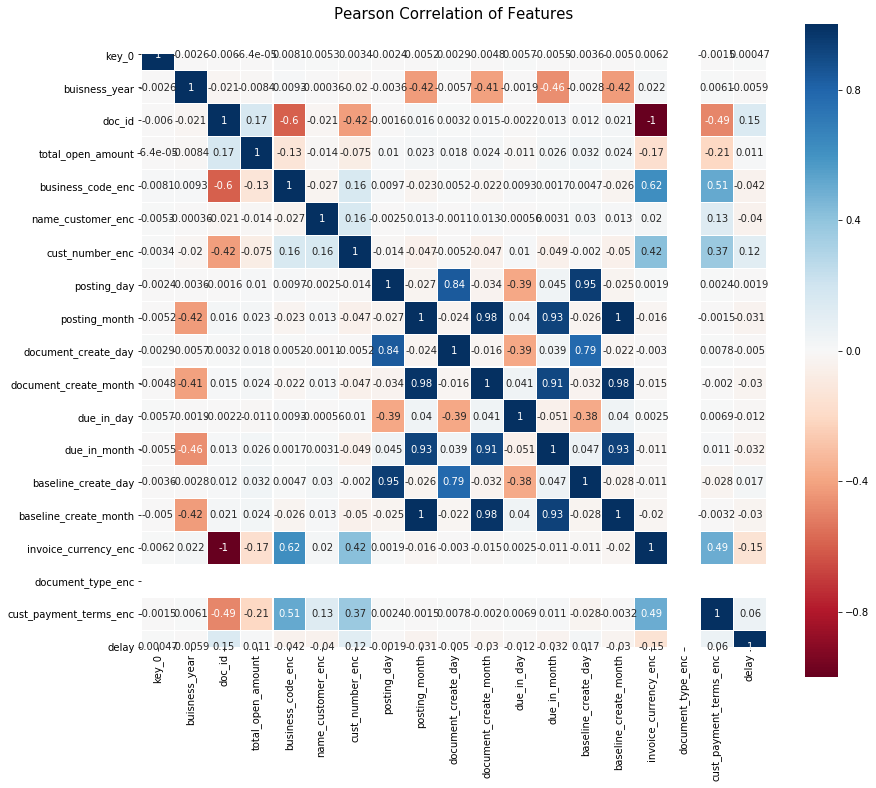

In [81]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train_f1.merge(y_train , on = x_train_f1.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [82]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [83]:
corr_features1 = correlation(x_train_f1, 0.78)
len(set(corr_features1))

6

In [84]:
corr_features1

{'baseline_create_day',
 'baseline_create_month',
 'document_create_day',
 'document_create_month',
 'due_in_month',
 'invoice_currency_enc'}

In [85]:
x_train_f1.drop(['baseline_create_day', 'baseline_create_month', 'document_create_day', 'document_create_month','invoice_currency_enc','due_in_month'], axis =1,inplace=True)

In [86]:
#Droping doc_id as it is highly unrelated
x_train_f1.drop(['document_type_enc'], axis =1,inplace=True)

In [87]:
x_train_f1.drop(['cust_payment_terms_enc'], axis =1,inplace=True)

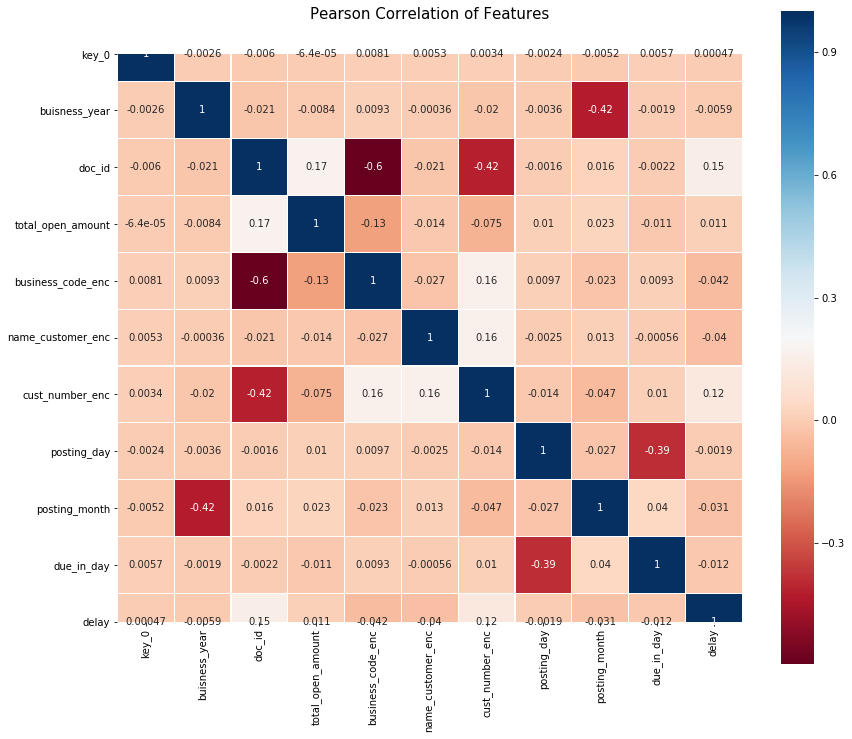

In [88]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train_f1.merge(y_train , on = x_train_f1.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [89]:
x_valid_f1.drop(['baseline_create_day', 'baseline_create_month', 'document_create_day', 'document_create_month','invoice_currency_enc','due_in_month','cust_payment_terms_enc','document_type_enc'], axis =1,inplace=True)
x_test_f1.drop(['baseline_create_day', 'baseline_create_month', 'document_create_day', 'document_create_month','invoice_currency_enc','due_in_month','cust_payment_terms_enc','document_type_enc'], axis =1,inplace=True)

In [90]:
x_train_f1.head()

,buisness_year,doc_id,total_open_amount,business_code_enc,name_customer_enc,cust_number_enc,posting_day,posting_month,due_in_day
4821,2019,1.929766e+09,64735.62,1,2799,397,20,8,4
34175,2019,1.929933e+09,23608.63,1,1909,693,27,9,12
1353,2019,1.930167e+09,38060.15,1,3279,890,18,11,20
36432,2019,1.930043e+09,2881.67,1,3372,616,22,10,1
31784,2019,1.929563e+09,80065.95,1,2070,1170,1,7,16


# Milestone3

## Modeling

### Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_train_f1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_predict = base_model.predict(x_valid_f1)

In [93]:

from sklearn.metrics import mean_squared_error,r2_score

mean_squared_error(y_valid, y_predict)

100.00243935928174

In [94]:
r2_score(y_valid,y_predict)

-0.020637179331119526

In [95]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [96]:
met.head()

,Predicted,Actuals
0,-0.816955,2
1,-2.961542,0
2,-3.102475,-11
3,-2.133874,0
4,-2.173469,1


In [97]:
y_valid.dtypes

dtype('int64')

In [98]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

inf

## Tree based model

In [99]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [100]:
model2.fit(x_train_f1, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [101]:
y_predict2 = model2.predict(x_valid_f1)

In [102]:

mean_squared_error(y_valid, y_predict2)

99.37357816707926

In [103]:
r2_score(y_valid, y_predict2)

-0.014218944760916674

In [104]:
met1 = pd.DataFrame(zip(y_predict2 , y_test),columns=['Predicted','Actuals'])

## Random Forest model

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
model3=RandomForestClassifier()

In [107]:
model3.fit(x_train_f1, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
y_predict3 = model3.predict(x_valid_f1)

In [109]:
mean_squared_error(y_valid, y_predict3)

131.95036718156496

In [110]:
r2_score(y_valid, y_predict3)

-0.3467016548271653

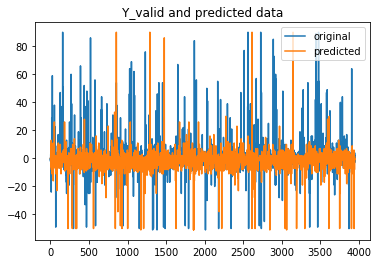

In [111]:
x_ax = range (len (y_valid))
plt.plot(x_ax, y_valid , label="original") 
plt.plot(x_ax, y_predict3 , label="predicted") 
plt.title("Y_valid and predicted data") 
plt.legend()
plt.show()

### Checking on x_test_f1 data

In [112]:
y_predict_test = model3.predict(x_test_f1 )
mean_squared_error(y_test, y_predict_test)

140.43150164598632

In [113]:
r2_score(y_test, y_predict_test)

-0.38468093359521216

In [114]:
met_final = pd.DataFrame(zip(y_predict_test , y_test),columns=['Predicted','Actuals'])

In [115]:
met_final.head()

,Predicted,Actuals
0,-1,2
1,0,0
2,-5,-11
3,-2,0
4,-5,1


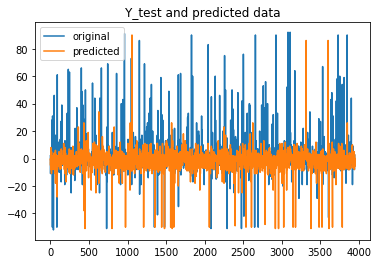

In [116]:
x_ax = range (len (y_valid))
plt.plot(x_ax, y_test , label="original") 
plt.plot(x_ax,y_predict_test , label="predicted") 
plt.title("Y_test and predicted data") 
plt.legend()
plt.show()

# End

In [121]:
import sklearn.metrics as sm
clf5 = LinearRegression()
clf5.fit(x_train_f1, y_train)

# Predicting the Test Set Results
predicted5 = clf5.predict(x_valid_f1)


print("Mean absolute error =", round(sm.mean_absolute_error(y_valid, predicted5), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_valid, predicted5), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_valid, predicted5), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_valid, predicted5), 2)) 
print("R2 score =", round(sm.r2_score(y_valid, predicted5), 2))
print("Accuracy= ", clf5.score(x_valid_f1,y_valid))

Mean absolute error = 5.11
Mean squared error = 100.0
Median absolute error = 3.29
Explain variance score = 0.06
R2 score = -0.02
Accuracy=  -0.020637179331119526
